In [165]:
scipy.io.loadmat("data/imagelabels.mat")

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Thu Feb 19 15:43:33 2009',
 '__version__': '1.0',
 '__globals__': [],
 'labels': array([[77, 77, 77, ..., 62, 62, 62]], dtype=uint8)}

In [12]:
with open("names.txt", "r") as f:
    print([i.strip().split(":")[-1].strip() for i in f.read().splitlines()])

['am general hummer suv 2000', 'acura rl sedan 2012', 'acura tl sedan 2012', 'acura tl type-s 2008', 'acura tsx sedan 2012', 'acura integra type r 2001', 'acura zdx hatchback 2012', 'aston martin v8 vantage convertible 2012', 'aston martin v8 vantage coupe 2012', 'aston martin virage convertible 2012', 'aston martin virage coupe 2012', 'audi rs 4 convertible 2008', 'audi a5 coupe 2012', 'audi tts coupe 2012', 'audi r8 coupe 2012', 'audi v8 sedan 1994', 'audi 100 sedan 1994', 'audi 100 wagon 1994', 'audi tt hatchback 2011', 'audi s6 sedan 2011', 'audi s5 convertible 2012', 'audi s5 coupe 2012', 'audi s4 sedan 2012', 'audi s4 sedan 2007', 'audi tt rs coupe 2012', 'bmw activehybrid 5 sedan 2012', 'bmw 1 series convertible 2012', 'bmw 1 series coupe 2012', 'bmw 3 series sedan 2012', 'bmw 3 series wagon 2012', 'bmw 6 series convertible 2007', 'bmw x5 suv 2007', 'bmw x6 suv 2012', 'bmw m3 coupe 2012', 'bmw m5 sedan 2010', 'bmw m6 convertible 2010', 'bmw x3 suv 2012', 'bmw z4 convertible 2012

In [1]:
from fomo.datasets.stanford_cars import StanfordCars
from fomo.datasets._labels import STANFORD_CARS
import matplotlib.pyplot as plt

ds = StanfordCars("data", train=False)

/Users/dqmis/github/fomo/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


54


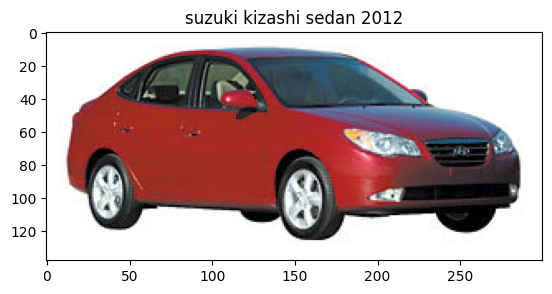

34


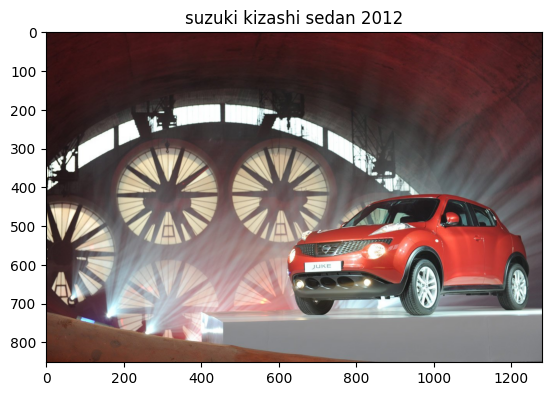

97


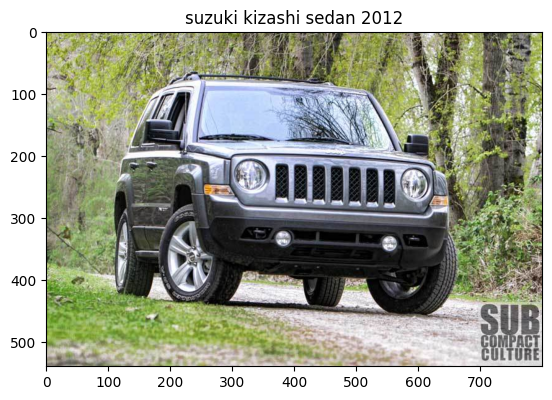

81


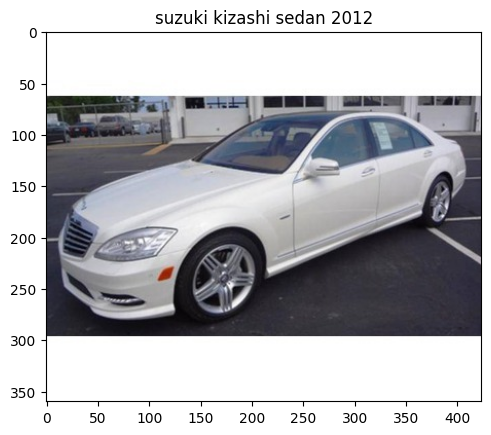

2


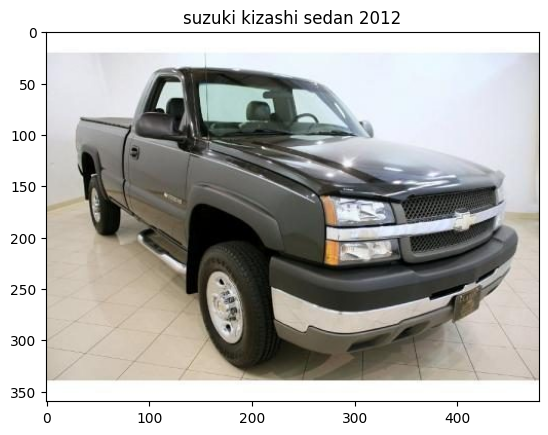

8


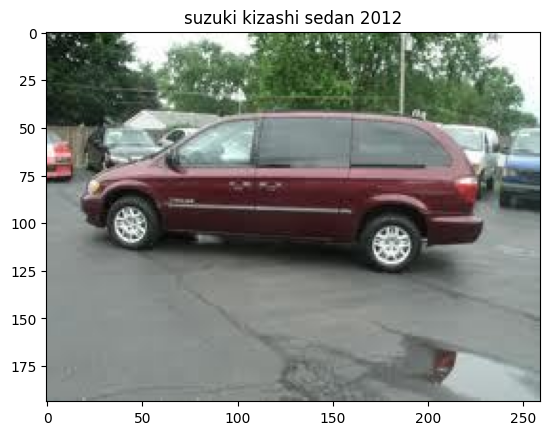

77


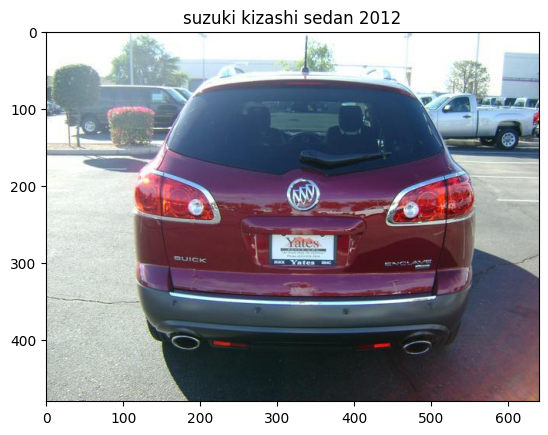

25


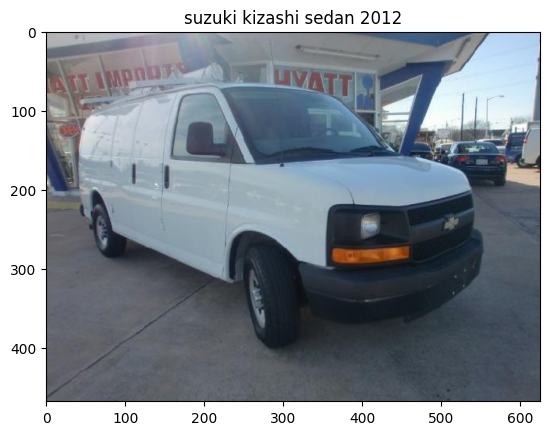

55


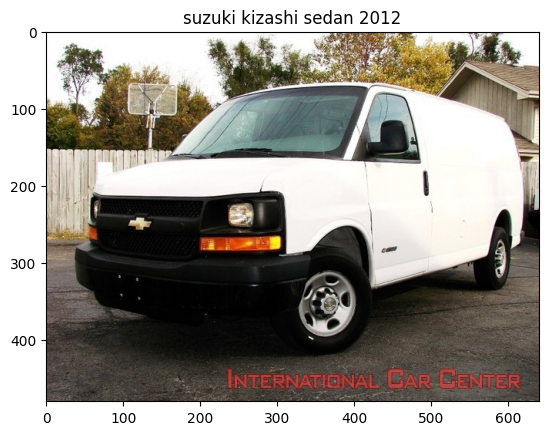

26


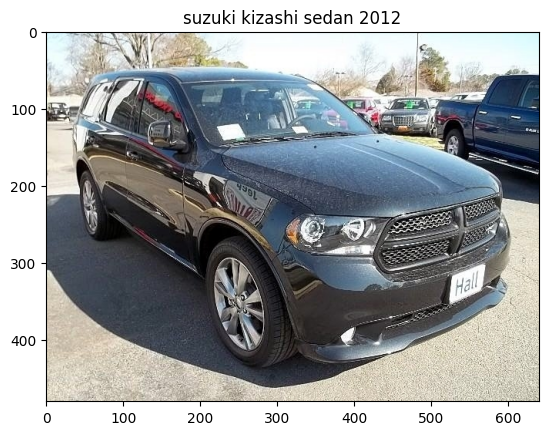

In [4]:
a = 0
for i in ds:
    img, label = i
    plt.imshow(img)
    print(label)
    plt.title(STANFORD_CARS[181])
    plt.show()
    a += 1
    if a == 10:
        break

In [5]:
import scipy.io
mat = scipy.io.loadmat('data/stanford-cars/cars_annos.mat')

In [6]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sat Feb 28 19:34:55 2015',
 '__version__': '1.0',
 '__globals__': [],
 'annotations': array([[(array(['car_ims/000001.jpg'], dtype='<U18'), array([[112]], dtype=uint8), array([[7]], dtype=uint8), array([[853]], dtype=uint16), array([[717]], dtype=uint16), array([[1]], dtype=uint8), array([[0]], dtype=uint8)),
         (array(['car_ims/000002.jpg'], dtype='<U18'), array([[48]], dtype=uint8), array([[24]], dtype=uint8), array([[441]], dtype=uint16), array([[202]], dtype=uint8), array([[1]], dtype=uint8), array([[0]], dtype=uint8)),
         (array(['car_ims/000003.jpg'], dtype='<U18'), array([[7]], dtype=uint8), array([[4]], dtype=uint8), array([[277]], dtype=uint16), array([[180]], dtype=uint8), array([[1]], dtype=uint8), array([[0]], dtype=uint8)),
         ...,
         (array(['car_ims/016183.jpg'], dtype='<U18'), array([[25]], dtype=uint8), array([[32]], dtype=uint8), array([[587]], dtype=uint16), array([[359]], dt

In [18]:
import matplotlib.pyplot as plt

In [22]:
import os

import pandas as pd
import scipy.io
import torch
from PIL import Image


class StanfordCars(torch.utils.data.Dataset):
    def __init__(self, root_path: str, train: bool = True) -> None:
        root_path = os.path.join(root_path, "stanford-cars")
        subdirs_path = "car_data/car_data/"
        subpath = subdirs_path + "train" if train else subdirs_path + "test"
        self.root_path = root_path
        self.split_path = os.path.join(root_path, subpath)

        print(self.split_path)

        self.images = [
            os.path.join(self.split_path, subdir, file)
            for subdir in os.listdir(self.split_path)
            for file in os.listdir(os.path.join(self.split_path, subdir))
            if file.endswith(".jpg")
        ]

        self.labels = self._extract_labels()
        self.is_train_split = train
        self.label_map = self._build_label_map()

    def _extract_labels(self) -> list[str]:
        with open(os.path.join(self.root_path, "names.csv"), "r") as f:
            return [i.strip().split(",")[-1] for i in f.read().splitlines()]

    def _build_label_map(self) -> dict[str, int]:
        annotations_file = f"anno_{'train' if self.is_train_split else 'test'}.csv"

        labels_map = {}

        with open(os.path.join(self.root_path, annotations_file), "r") as f:
            samples = [i.strip().split(",") for i in f.read().splitlines()]
        for sample in samples:
            labels_map[sample[0]] = int(sample[-1])
        return labels_map


    def __len__(self) -> int:
        return len(self.images)

    def __getitem__(self, index: int) -> tuple[Image.Image, int]:
        image_file = self.images[index]
        image = Image.open(image_file).convert("RGB")
        return image, self.label_map[image_file.split("/")[-1]]


In [ ]:
from torchvision.datasets import ImageNet

ds = ImageNet("data", split="val", download=True)

In [29]:
from torchvision.datasets import Food101

ds = Food101("data", split="test", download=True)

Using downloaded and verified file: data/food-101.tar.gz
Extracting data/food-101.tar.gz to data


In [32]:
ds.classes

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheese_plate',
 'cheesecake',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

In [1]:
from fomo.utils.data.datasets import DatasetInitializer

/Users/dominykas.seputis/github/fomo/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset_loader = DatasetInitializer.from_str("cifar10")

In [5]:
dataset_loader.value(train=False, transforms=model.transforms),